In [1]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import statistics
import scipy.io
import h5py
import sys
PlottingFormat_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

%matplotlib inline

In [18]:
#Load data
dat = np.load('Data/F.npy', allow_pickle=True)
iscell = np.load('Data/iscell.npy', allow_pickle=True)

In [19]:
#Only get those classified as cells
F = []
for n, c in enumerate(iscell):
    if c[0]:
        F.append(dat[n, :])
F = np.asarray(F)

In [41]:
f = h5py.File('Data/CFC4_suite2p_segmented_data_forpython.mat', 'r')
Fc3 = np.asarray(f['Fc3'])

In [34]:
#Get place cells
placecelldata = np.load('Data/CFC4_placecell_data.npz', allow_pickle=True)
pcells = placecelldata['sig_PFs_cellnum'].item()['Task1']
Fc3_pc = Fc3[pcells, :]

In [48]:
for f in behdata.files:
    print(f)

running_data
good_running_data
numlaps
reward_data
lick_data
numlicks_withinreward
numlicks_outsidereward
goodlaps_laptime
actuallaps_laptime
numlicks_perspatialbin
licks_bytimefromreward
lick_spatialbins
lick_stop
good_running_index
velocity_spatialbins
velocity_byrewardtime
actualrunninglaps
lickperlap


In [65]:
# Get running data
behdata = np.load('Data/behavior_data.npz', allow_pickle=True)
runningdata = behdata['good_running_data'].item()
index = behdata['good_running_index'].item()
lickdata = behdata['lick_data'].item()
runningdata_combined = np.vstack((runningdata['Task1'],
                                  runningdata['Task2'],
                                  runningdata['Task3']))
index_combined = np.hstack((index['Task1'],
                            index['Task2']+15000,
                            index['Task3']+35000))
lickdata_combined = np.vstack((lickdata['Task1'],
                               lickdata['Task2'],
                               lickdata['Task3']))

In [67]:
index_combined[-1]

49978

In [68]:
data_to_use = Fc3[:, index_combined]

In [63]:
np.shape(data_to_use)

(1924, 21389)

In [69]:
# rastermap algorithm
import sys
sys.path.append('rastermap/rastermap/')
import mapping, imp
imp.reload(mapping)

model = mapping.Rastermap(n_components=1, n_X=30, nPC=200).fit(data_to_use)

nmin 200
0.16181159019470215
2.286083698272705
2.419569253921509
2.4236605167388916
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.12s     0        0.0627      2
0.15s    10        0.1052      4
0.17s    20        0.1477      8
0.20s    30        0.2138      18
0.23s    40        0.2695      28
0.25s    50        0.2721      28
0.27s   final      0.2724
0.28s upsampled    0.2724


In [70]:
### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(data_to_use[isort,:].T, np.minimum(1,int(data_to_use.shape[0]*0.005)), axis=1)
Sm = Sm.T

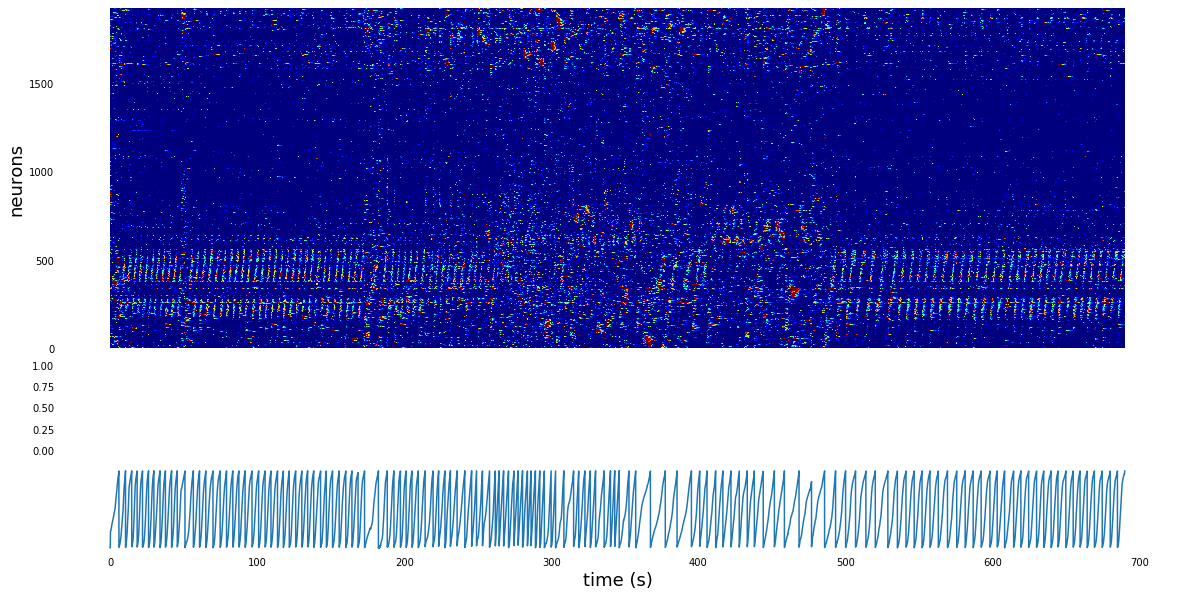

In [71]:
### view neuron sorting
fs = 31 # sampling rate of data in Hz
splot = Sm[:, :]
f, ax = plt.subplots(3, 1, figsize=(20, 10), sharex='all', gridspec_kw={'height_ratios':[2, 0.5, 0.5], 'hspace':0.1})

ax[0].imshow(splot, vmin=0, vmax=0.5, cmap='jet', aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
x = np.linspace(0, np.size(runningdata_combined)/fs, np.size(runningdata_combined))   

# l = (lickdata_combined>1)*np.max(np.mean(splot, 0))
# l[l==0] = np.nan
# ax[1].plot(x, np.mean(splot, 0))
# ax[1].plot(x, l, '|', color='#a6611a', linewidth=0.8, markersize=10)

# l = (lickdata_combined>1)*np.max(runningdata_combined)
# l[l==0] = np.nan
ax[2].plot(x, runningdata_combined)
# ax[2].plot(x, l, '|', color='#a6611a', linewidth=0.8, markersize=10)


ax[0].set_ylabel('neurons', fontsize=18)
ax[2].set_xlabel('time (s)', fontsize=18)
ax[2].set_yticklabels([])

for a in ax:
#     a.set_xlim((442, 800))
    pf.set_axes_style(a, numticks=4)
plt.show()

### Reward Data rastermap

In [46]:
#Get place cells
reward_data = np.load('Data/reward_data.npy', allow_pickle=True)

In [47]:
model = mapping.Rastermap(n_components=1, n_X=30, nPC=200).fit(reward_data)

nmin 200
0.48432278633117676
11.341152429580688
12.05558729171753
12.080380916595459
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0688      2
0.04s    10        0.1100      4
0.08s    20        0.1669      8
0.12s    30        0.2444      18
0.17s    40        0.3062      28
0.21s    50        0.3076      28
0.24s   final      0.3074
0.25s upsampled    0.3074


In [48]:
### sort neurons and smooth across neurons and zscore in time
isort = np.argsort(model.embedding[:,0])
Sm = gaussian_filter1d(reward_data[isort,:].T, np.minimum(3,int(reward_data.shape[0]*0.005)), axis=1)
Sm = Sm.T

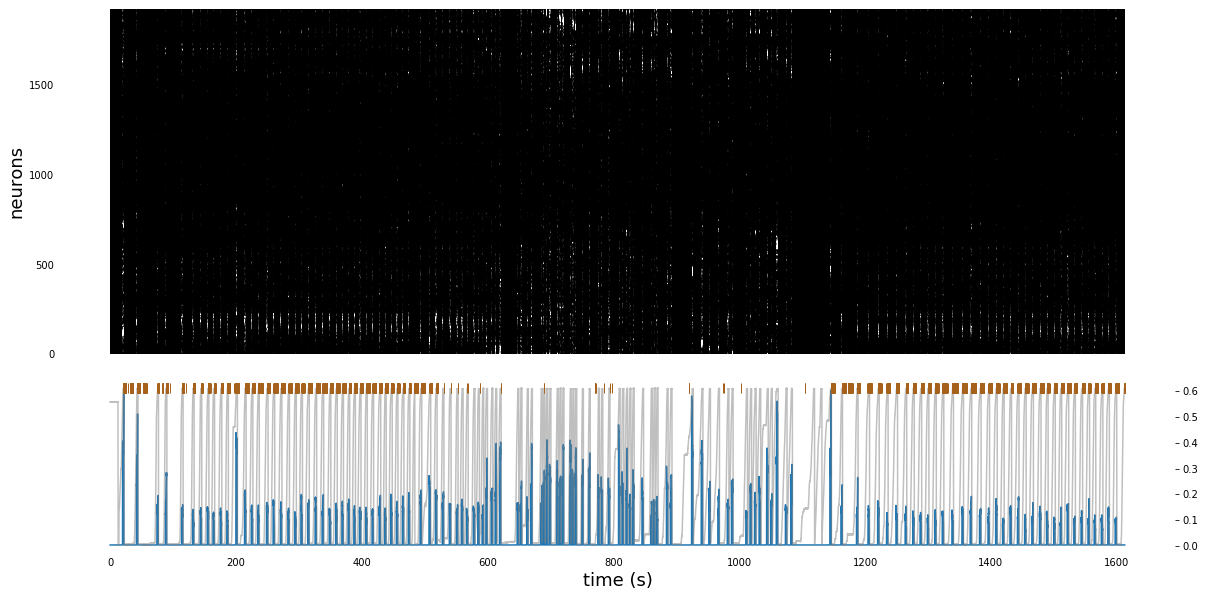

In [49]:
### view neuron sorting
fs = 31 # sampling rate of data in Hz
splot = Sm[:, :49999]
f, ax = plt.subplots(2, 1, figsize=(20, 10), sharex='all', gridspec_kw={'height_ratios':[2, 1], 'hspace':0.1})

ax[0].imshow(splot, vmin=0, vmax=0.5, cmap='gray', aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
x = np.linspace(0, np.size(runningdata_combined)/fs, np.size(runningdata_combined))   

ax[1].plot(x, np.mean(splot, 0))

ax2 = ax[1].twinx()
l = (lickdata_combined>1)*np.max(runningdata_combined)
l[l==0] = np.nan
ax2.plot(x, runningdata_combined, 'gray', alpha=0.5)
ax2.plot(x, l, '|', color='#a6611a', linewidth=0.8, markersize=10)

ax[0].set_ylabel('neurons', fontsize=18)
ax[1].set_xlabel('time (s)', fontsize=18)
ax[1].set_yticklabels([])

for a in ax:
#     a.set_xlim((442, 800))
    pf.set_axes_style(a, numticks=4)
plt.show()

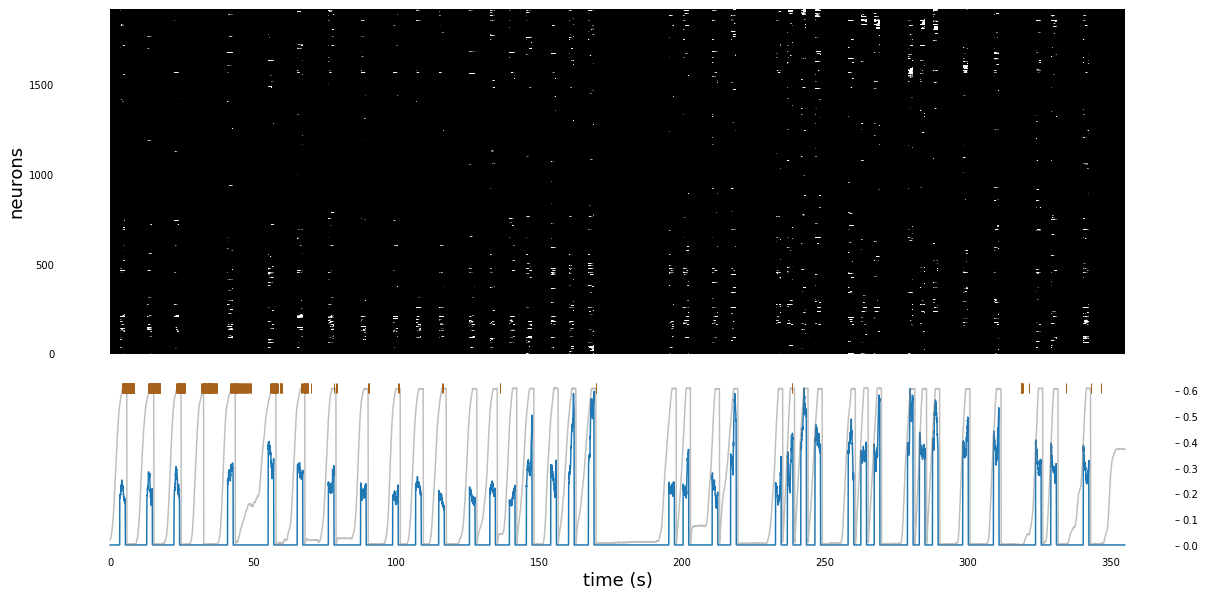

In [58]:
fs = 31 # sampling rate of data in Hz
beg = 14000
end = 25000
splot = reward_data[isort, beg:end]
runplot = runningdata_combined[beg:end]
lickplot = lickdata_combined[beg:end]
f, ax = plt.subplots(2, 1, figsize=(20, 10), sharex='all', gridspec_kw={'height_ratios':[2, 1], 'hspace':0.1})

ax[0].imshow(splot, vmin=0, vmax=0.5, cmap='gray', aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
ax[0].imshow(splot, vmin=0, vmax=0.5, cmap='gray', aspect='auto',extent=[0,splot.shape[1]/fs, 0,splot.shape[0]])
x = np.linspace(0, np.size(runplot)/fs, np.size(runplot))   

ax[1].plot(x, np.mean(splot, 0))

ax2 = ax[1].twinx()
l = (lickplot>1)*np.max(runplot)
l[l==0] = np.nan
ax2.plot(x, runplot, 'gray', alpha=0.5)
ax2.plot(x, l, '|', color='#a6611a', linewidth=0.8, markersize=10)

ax[0].set_ylabel('neurons', fontsize=18)
ax[1].set_xlabel('time (s)', fontsize=18)
ax[1].set_yticklabels([])

for a in ax:
#     a.set_xlim((442, 800))
    pf.set_axes_style(a, numticks=4)
plt.show()